In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from design.colormap import color_map
from design.letters import letters
from design.columns_names import *

In [3]:
df_anova = pd.read_csv('data.csv')

In [4]:
df_anova.head()

,quest_sleep_time_x,quest_sleep_quality_x,quest_sport_time_x,quest_meetings_x,quest_mood_x,quest_stress_x,bmr_kilocalories_x,steps_x,distance_in_meters_x,min_heart_rate_in_beats_per_minute_x,...,sleep_start_hour_w,record_dates_count_w,screen_daily_count_w,screen_duration_avg_w,screen_duration_total_w,screen_threshold_w,still_ratio_w,bluetooth_distinct_names_w,screen_during_night_count_w,risk_group
0,6.753968,0.849206,22.420635,6.626984,0.547619,0.000000,1368.000000,4740.500000,3101.500000,53.928571,...,22.780159,95.928571,74.912698,131.475871,9087.785714,20.333333,0.956558,31.190476,18.492063,low
1,7.385714,0.489796,31.870748,4.795918,1.197279,-0.693878,1481.000000,6566.571429,4328.857143,54.785714,...,23.425397,86.746032,37.841270,560.219182,19229.468250,2.738095,0.840139,55.214286,8.650794,low
2,6.642857,1.761905,1.428571,16.666667,2.000000,-2.000000,NaN,NaN,NaN,NaN,...,NaN,59.142857,93.801587,333.764559,29977.380950,3.244898,0.764026,112.857143,19.952381,low
3,NaN,NaN,NaN,NaN,NaN,NaN,1586.000000,7317.428571,4893.357143,49.857143,...,23.928307,78.603175,69.095238,119.149827,7341.293651,30.896825,0.900237,15.107143,16.190476,high
4,NaN,NaN,NaN,NaN,NaN,NaN,1569.571429,766.285714,537.857143,56.142857,...,25.995238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


In [6]:
df_anova[['screen_duration_total_x','screen_duration_total_y','screen_duration_total_z','screen_duration_total_w']] /= 3600
df_anova[['still_ratio_x','still_ratio_y','still_ratio_z','still_ratio_w']] *= 100


In [11]:
def create_df_like_anova(col):
    p_in_anova = list(df_anova[(df_anova[col+'_x'].notna())&(df_anova[col+'_y'].notna())&(df_anova[col+'_z'].notna())&(df_anova[col+'_w'].notna())].index)
    df = df_anova[df_anova.index.isin(p_in_anova)][[col+'_x',col+'_y',col+'_z',col+'_w']]
    df.columns = ['t1','t2','t3','t4']
    return df
    

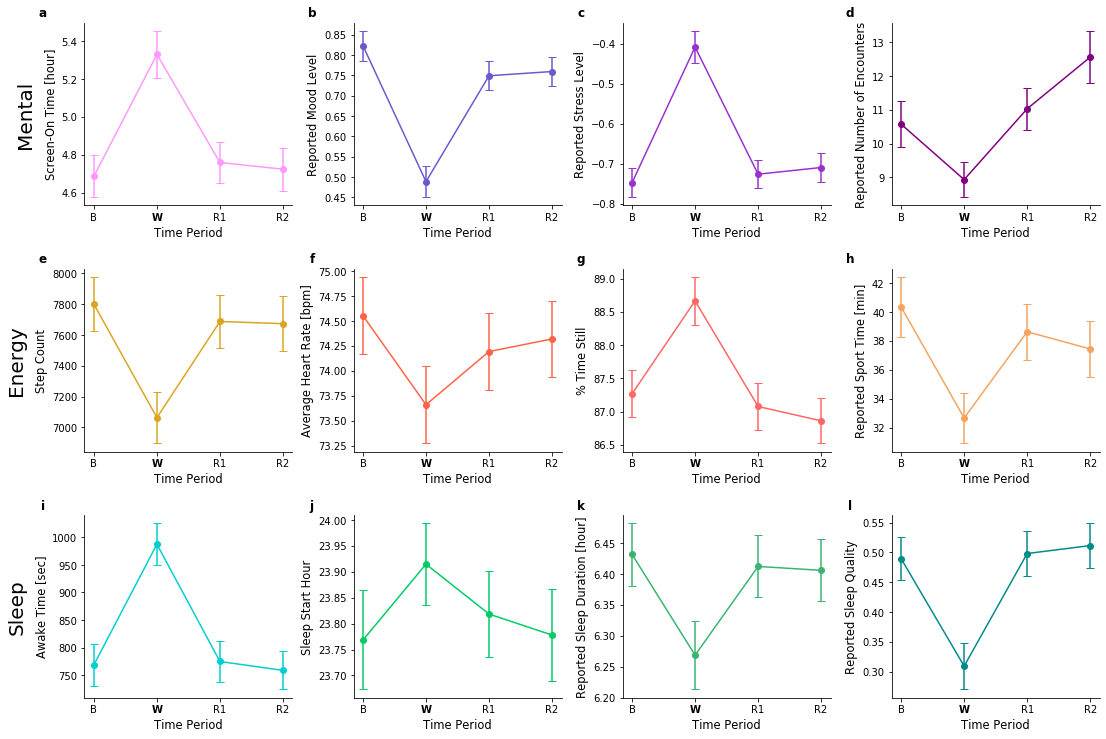

In [14]:
rows = ['Mental','Energy','Sleep']
sections = [mental,energy,sleep]

fig, axs = plt.subplots(len(sections), len(sections[0]),figsize=(15,10),facecolor='white')

for i in range(len(sections)):
    for j in range(len(sections[i])):
        if list(sections[i].keys())[j]+'_x' in df_anova:
            temp_df = create_df_like_anova(list(sections[i].keys())[j])

            y = list(pd.DataFrame(temp_df.mean())[0].values)
            x =  ['B','W','R1','R2']
            std = list(pd.DataFrame(temp_df.std())[0].values)
            yerr = [i/np.sqrt(temp_df.shape[0]) for i in std]
            axs[i,j].errorbar(x, y, yerr, marker='o', capsize=4,color = color_map[list(sections[i].keys())[j]])
            axs[i,j].set_ylabel(list(sections[i].values())[j] , fontsize = 11.5)
            axs[i,j].spines['right'].set_visible(False)
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].get_xticklabels()[1].set_weight("bold")
            axs[i,j].set_title(letters[i*4+j].lower(),fontweight='bold',x=-0.2,y=1)
            axs[i,j].set_xlabel('Time Period',fontsize=11.5)


pad = 5 # in points


for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                ha='right', va='center', rotation=90, fontsize=20)#size:'large'

fig.tight_layout()
fig.subplots_adjust(left=0.05, top=1)

plt.show()


In [15]:
def create_df_like_anova_location(col):
    p_in_anova = list(df_anova[(df_anova[col+'_x'].notna())&(df_anova[col+'_y'].notna())&
                               (df_anova[col+'_z'].notna())&(df_anova[col+'_w'].notna())].index)
    df = df_anova[df_anova.index.isin(p_in_anova)][[col+'_x',col+'_y',col+'_z',col+'_w','risk_group']]
    df.columns = ['t1','t2','t3','t4','risk_group']
    return df
    

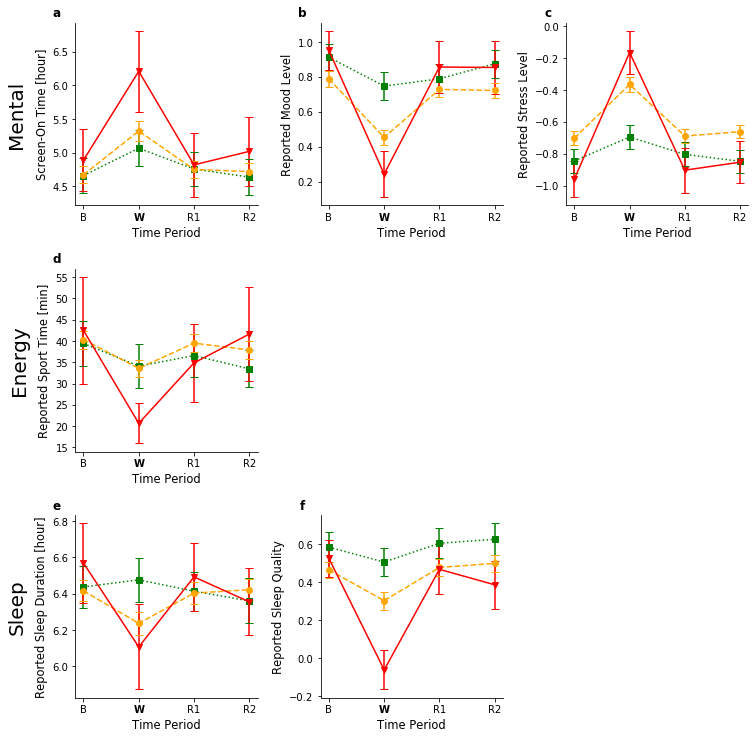

In [17]:
rows = ['Mental','Energy','Sleep']
fig, axs = plt.subplots(3,3,figsize=(10,10),facecolor='white')

interactions_first = {'screen_duration_total':'Screen-On Time [hour]','quest_mood': 'Reported Mood Level', 'quest_stress': 'Reported Stress Level'}
interactions_second = {'quest_sport_time':'Reported Sport Time [min]'} 
interactions_third = {'quest_sleep_time': 'Reported Sleep Duration [hour]','quest_sleep_quality': 'Reported Sleep Quality'}

sections = [interactions_first,interactions_second,interactions_third]
letters_cnt = 0
for i in range(len(sections)):
    for j in range(len(sections[i])):
        temp_df = create_df_like_anova_location(list(sections[i].keys())[j])

        x = ['B','W','R1','R2']
        cnt = 0
        
        lines = ['dotted','dashed','solid']
        for loc,curr_color,mi in zip(['low','medium','high'],['green','orange','red'],["s" , "o" , "v" ]):
            
            y = list(pd.DataFrame(temp_df[temp_df['risk_group']==loc].mean(numeric_only=True))[0].values)
            std = list(pd.DataFrame(temp_df[temp_df['risk_group']==loc].std(numeric_only=True))[0].values)
            yerr = [i/np.sqrt(temp_df[temp_df['risk_group']==loc].shape[0]) for i in std]
            axs[i,j].errorbar(x, y, yerr, marker=mi, capsize=4,color = curr_color, label = loc, linestyle = lines[cnt])
            # get handles
            handles, labels = axs[i,j].get_legend_handles_labels()
            # remove the errorbars
            handles = [h[0] for h in handles]
            # use them in the legend
            if [i,j]==[2,2]:
                axs[i,j].legend(handles, ['Low Exposure','Medium Exposure','High Exposure'],bbox_to_anchor=(0.5, 0., 1, 1))
                
            axs[i,j].set_ylabel(list(sections[i].values())[j] , fontsize = 11.5)
            axs[i,j].spines['right'].set_visible(False)
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].get_xticklabels()[1].set_weight("bold")
            axs[i,j].set_title(letters[letters_cnt].lower(),fontweight='bold',x=-0.1,y=1)
            axs[i,j].set_xlabel('Time Period',fontsize=11.5)               
            cnt+=1
        letters_cnt+=1
axs[1,2].set_visible(False)      
axs[2,2].set_visible(False)
axs[1,1].set_visible(False)

pad = 5 # in points


for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                ha='right', va='center', rotation=90, fontsize=20)

fig.tight_layout()
fig.subplots_adjust(left=0.05, top=1)

plt.show()
